**DIABETES CASES CLASSISFICATION WITH NLP -- USING NLTK CLASSIFIERS**
More examples :[here](https://www.nltk.org/howto/classify.html)

DATA DETAILS: (Pima Indians Diabetes Dataset)

  A. Number of times pregnant
  B. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
  C. Diastolic blood pressure (mm Hg)
  D. Triceps skin fold thickness (mm)
  E. 2-Hour serum insulin (mu U/ml)
  F. Body mass index (weight in kg/(height in m)^2)
  G. Diabetes pedigree function
  H. Age (years)
  I. Class variable (0 or 1)

In [2]:
import numpy as np
import pandas as pd
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#nltk.download('stopwords')

In [3]:
cols=["A", "B", "C", "D", "E", "F", "G", "H", "I"]
#r= requests.get(url)#
#open('temp1.csv', 'wb').write(r.content)
#df = pd.read_csv('temp1.csv', header=None, names=cols)
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

In [4]:
df = pd.read_csv(url, header=None, names=cols)
df.head(2)

,A,B,C,D,E,F,G,H,I
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


**ANALYSIS**

In [20]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

*No missing value*

In [40]:
dfx = df.drop(df[["I"]], axis=1)
dfy = df["I"]

In [ ]:
dfx

In [10]:
df.describe()

,A,B,C,D,E,F,G,H,I
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corrwith(df['I'], axis=0, drop=False, method='pearson')

A    0.221898
B    0.466581
C    0.065068
D    0.074752
E    0.130548
F    0.292695
G    0.173844
H    0.238356
I    1.000000
dtype: float64

*B (B. Plasma glucose concentration a 2 hours in an oral glucose tolerance test ) has the highest positive corelation with the target I, lets draw a heatmap to see the relationship clearer*

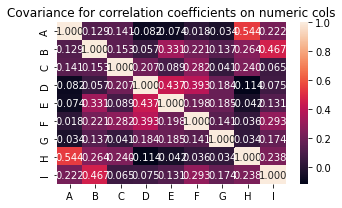

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
#fig, ax = plt.subplots(figsize=(5,3))
plt.figure(figsize=(5,3))
sn.heatmap(df.corr(), annot=True, fmt='.3f', yticklabels=df.columns, xticklabels=df.columns)
plt.title('Covariance for correlation coefficients on numeric cols')
plt.tight_layout()
plt.show()

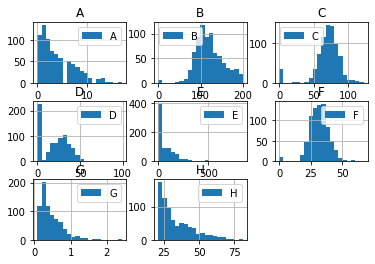

In [24]:
dfx.hist(bins=20, legend=True)
plt.show()

*Because we are using NLP technique, we dont need to scale the dataset, so lets go right into the NLP modelling*

**NLP MODELLING**

In [37]:
##### WE START BY DEFINING FEATURES FOR NLP MODELLING

import random
def sel_features(x):
    #print(x)
    fet={}   
    hed= ["A", "B", "C", "D", "E", "F", "G", "H", "I"]
    for j, k in enumerate (x):                  
        fet['{}'.format(hed[j])]=k  
           #(dict(a=1,b=1,c=1), 'y')        
    return(fet) 

def extract(datax, datay): #function to create featureset 1
    k=[str (s) for s in datay]
    sel_featurs=[]
    for index, item in enumerate (datax):
       sel_featurs.append((sel_features(item), str(k[index])))
    return(sel_featurs)

def extract2(datax): #function to create Test set for new data
    sel_f=[]
    for index, item in enumerate (datax):
        sel_f.append(sel_features(item))
    return(sel_f)

In [57]:
#FUNCTION FOR FUNNING CLASSIFICATION MODELS
def classifies(classif, xtrains, xtests, s):
   print(f'{s} score is:\t', nltk.classify.accuracy(classif, xtests))

   '''
   errors = []
   for (name, tag) in xtests:
      guess =classif.classify(name)
      #print(guess, tag)
      if guess != tag:        
          errors.append( (tag, guess, name))
      #xtests.show_most_informative_features(20)     
      #for (tag, guess, name) in sorted(errors):
          #print('correct={} guess={} name={}'.format(tag, guess, name))
    print(len(errors))
    print(len(xtests))
   '''

**TO CREATE TRAIN TEST SETS WE WILL DO IT I TWO WAYS**

In [41]:
                 #1. USING SKLEARN TRAIN-TEST-SPLIT                 
                 #########################################################

from nltk.classify import SklearnClassifier as skc
from sklearn.model_selection import train_test_split

dfx=dfx.values

X_train, X_test, Y_train, Y_test = train_test_split(dfx, dfy, test_size=0.33, random_state=42)

X_tr=extract(X_train, Y_train)
X_tt=extract(X_test, Y_test)

In [42]:
                   #2. USING DIRECT SPLITTING                 
                 #########################################################

xtr, ytr=dfx [358:], dfy[358:]
xtt, ytt=dfx [:358], dfy[:358]
#testx=extract2(xtt)

X_tr2=extract(xtr, ytr)
X_tt2=extract(xtt, ytt)

In [44]:
X_tr2[:3]

[({'A': 12.0,
   'B': 88.0,
   'C': 74.0,
   'D': 40.0,
   'E': 54.0,
   'F': 35.3,
   'G': 0.378,
   'H': 48.0},
  '0'),
 ({'A': 1.0,
   'B': 196.0,
   'C': 76.0,
   'D': 36.0,
   'E': 249.0,
   'F': 36.5,
   'G': 0.875,
   'H': 29.0},
  '1'),
 ({'A': 5.0,
   'B': 189.0,
   'C': 64.0,
   'D': 33.0,
   'E': 325.0,
   'F': 31.2,
   'G': 0.583,
   'H': 29.0},
  '1')]

In [58]:
##### NAIVE CLASIFY WITH NLP
#'''
classifierP = nltk.NaiveBayesClassifier.train(X_tr)
classifies(classifierP, X_tr, X_tt, 'NaiveBayesClassifier')
#'''

##### MAXTENT CLASIFY WITH NLP
#'''
from nltk.classify import maxent
encoding = maxent.TypedMaxentFeatureEncoding.train(X_tr, count_cutoff=3, alwayson_features=True)
classifierE= maxent.MaxentClassifier.train(X_tr, bernoulli=False, encoding=encoding, trace=0)
classifies(classifierE, X_tr, X_tt, 'MaxentClassifier')
#'''

##### SVC CLASIFY WITH NLP
#'''
from nltk.classify import SklearnClassifier as skc
from sklearn.svm import SVC 
classifS= skc(SVC(), sparse=False).train(X_tr)
classifies(classifS, X_tr, X_tt, 'SVCclassifier')
#'''#0.7440944881889764
#0.723463687150838

##### DT CLASIFY WITH NLP
#'''
classifierD = nltk.classify.DecisionTreeClassifier.train(X_tr2, entropy_cutoff=0,support_cutoff=0)
classifies(classifierD, X_tr, X_tt, 'DecisionTreeClassifier')
#'''

##### benoli CLASIFY WITH NLP
#'''
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
classiB = SklearnClassifier(BernoulliNB()).train(X_tr)
classifies(classiB, X_tr, X_tt, 'BernoulliNBclassifier')
#'''

NaiveBayesClassifier score is:	 0.65748031496063
MaxentClassifier score is:	 0.6614173228346457
SVCclassifier score is:	 0.7440944881889764
DecisionTreeClassifier score is:	 0.7795275590551181
BernoulliNBclassifier score is:	 0.6614173228346457


*Both spliting methods performed with very close results, but the sklearn train-test-split method was better. In addition, the SDECISION TREE classifier performed the best in both cases. These results can be improved by defining a better feature set extractor*


**USING THE MODEL**

In [59]:
modeld=classifierD 
def my_modl(arr):
  new_arr=extract2(arr)
  pred= modeld.classify_many(new_arr)
  print(pred)

  if (int(pred[0])==1):
    print('Sorry, you may soon have diabetes')
  else:
    print('congrats you are free from diabetes')
      
my_modl([[6,162,62,0,0,24.3,0.178,50]])

['1']
Sorry, you may soon have diabetes


**SAVING THE MODEL**

In [ ]:
#Now we save the model for future use
import joblib

# save the model to disk
f_name = 'diabetico.sav'
joblib.dump(modeld, f_name)
 
# some time later...
 
# load the model from disk
#saved_model = joblib.load(f_name)
#result = loaded_model.score(X_test, Y_test)

#OR to predict new data
#result = loaded_model.classify_many(your new data in 2d array)

#print(result)